In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터 불러오기

In [2]:
# adult_train 불러오기
column_name = ['age', 'workclass', 'fnlwgt', 'education', 
                 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital_gain', 
                 'capital_loss', 'hours_per_week', 'native_country','income']

adult_train = pd.read_csv('./adult_train.csv' , names = column_name) #컬럼명 추가
adult_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# 데이터 확인
adult_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
# 데이터 ???확인
adult_train.shape

(32561, 15)

# 결측치 확인

In [5]:
adult_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
display(adult_train['workclass'].unique())
display(adult_train['education'].unique())
display(adult_train['marital_status'].unique())
display(adult_train['occupation'].unique())
display(adult_train['relationship'].unique())
display(adult_train['race'].unique())
display(adult_train['sex'].unique())
display(adult_train['native_country'].unique())
display(adult_train['income'].unique())

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

array([' Male', ' Female'], dtype=object)

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

array([' <=50K', ' >50K'], dtype=object)

In [7]:
# '?'값 결측치 처리
adult_train = adult_train.replace(' ?', np.nan)

In [8]:
adult_train.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [9]:
# 결측치가 있는 데이터 값이 범주형이고 특별한 패턴이 없는 것 같아 행 삭제
adult_train = adult_train.dropna(subset=['workclass', 'occupation','native_country'])

In [10]:
adult_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# 데이터 전처리

In [11]:
adult_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


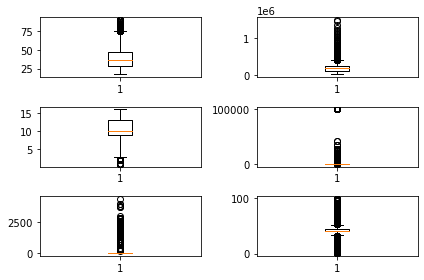

In [12]:
fig, axes = plt.subplots(3, 2)

axes[0][0].boxplot(adult_train['age'])

axes[0][1].boxplot(adult_train['fnlwgt'])

axes[1][0].boxplot(adult_train['education_num'])

axes[1][1].boxplot(adult_train['capital_gain'])

axes[2][0].boxplot(adult_train['capital_loss'])

axes[2][1].boxplot(adult_train['hours_per_week'])

plt.tight_layout()
plt.show()

In [13]:
# 이상치 기준을 잡기가 애매한 값이 있어 기준치를 따로 잡아 처리
adult_train = adult_train.replace(99999, 27828)
adult_train = adult_train.replace(41310, 27828)
adult_train = adult_train.replace(34095, 27828)

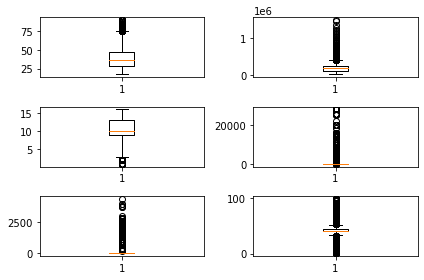

In [14]:
fig, axes = plt.subplots(3, 2)

axes[0][0].boxplot(adult_train['age'])

axes[0][1].boxplot(adult_train['fnlwgt'])

axes[1][0].boxplot(adult_train['education_num'])

axes[1][1].boxplot(adult_train['capital_gain'])

axes[2][0].boxplot(adult_train['capital_loss'])

axes[2][1].boxplot(adult_train['hours_per_week'])

plt.tight_layout()
plt.show()

In [15]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult_train = encode_features(adult_train)
adult_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


<AxesSubplot:>

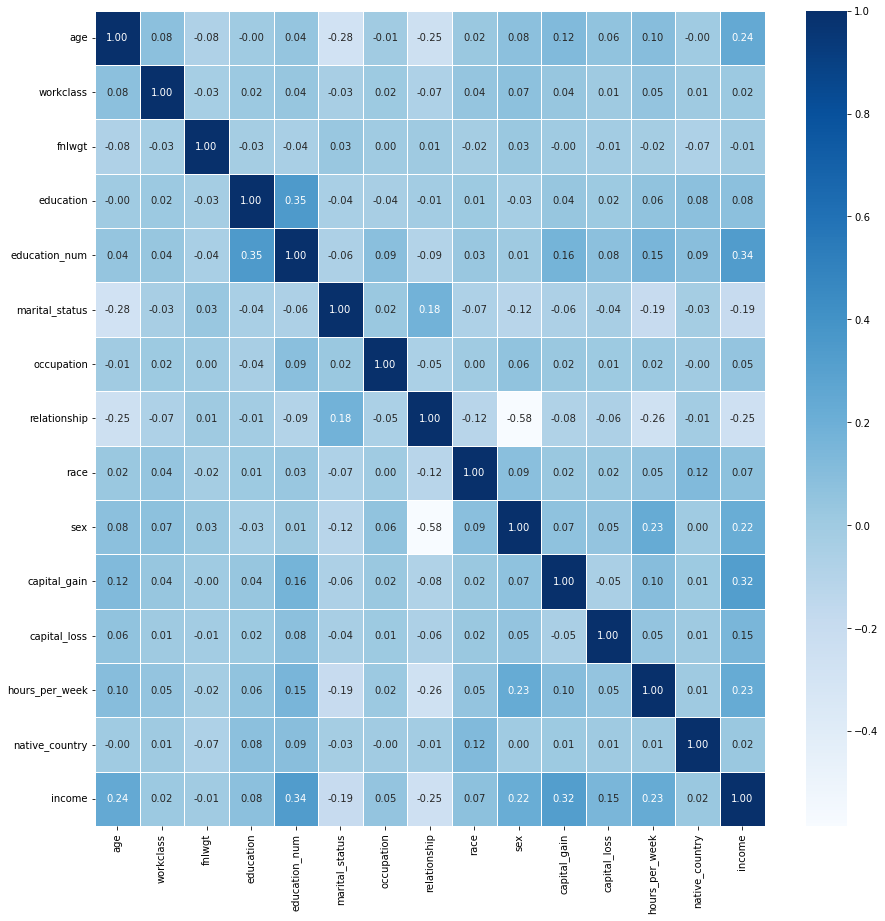

In [16]:
# 상관계수
plt.figure(figsize=(15,15))
sns.heatmap(data = adult_train.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [17]:
# # 머신러닝 알고리즘에 불필요한 속성 제거
# def drop_features(df):
#     df.drop(['fnlwgt', 'native_country', 'workclass', 'occupation', 'race'],axis=1,inplace=True)
#     return df

# adult_train = drop_features(adult_train)
# adult_train.head()

# 모델링

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
y_adult_train = adult_train['income']
X_adult_train= adult_train.drop('income',axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_adult_train, y_adult_train, \
                                                  test_size=0.2, random_state=10)

In [21]:
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8135


In [22]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.7880


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8538


In [24]:
import sklearn
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [25]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
        
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, ROC AUC 값: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = rf_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[4025  484]
 [ 434 1090]]
정확도: 0.8478, 정밀도: 0.6925, 재현율: 0.7152, F1:0.7037, ROC AUC 값: 0.8039
임곗값: 0.45
오차 행렬
[[4108  401]
 [ 507 1017]]
정확도: 0.8495, 정밀도: 0.7172, 재현율: 0.6673, F1:0.6914, ROC AUC 값: 0.7892
임곗값: 0.5
오차 행렬
[[4199  310]
 [ 572  952]]
정확도: 0.8538, 정밀도: 0.7544, 재현율: 0.6247, F1:0.6834, ROC AUC 값: 0.7780
임곗값: 0.55
오차 행렬
[[4266  243]
 [ 636  888]]
정확도: 0.8543, 정밀도: 0.7851, 재현율: 0.5827, F1:0.6689, ROC AUC 값: 0.7644
임곗값: 0.6
오차 행렬
[[4322  187]
 [ 696  828]]
정확도: 0.8536, 정밀도: 0.8158, 재현율: 0.5433, F1:0.6522, ROC AUC 값: 0.7509


# test 데이터 불러오기

In [26]:
column_name = ['age', 'workclass', 'fnlwgt', 'education', 
                 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital_gain', 
                 'capital_loss', 'hours_per_week', 'native_country','income']

adult_test = pd.read_csv('./adult_test.csv' , names = column_name)
adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## 결측치 확인

In [27]:
adult_test = adult_test.replace(' ?', np.nan)

In [28]:
adult_test.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64

In [29]:
adult_test = adult_test.dropna(subset=['workclass', 'occupation','native_country'])

In [30]:
adult_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [31]:
# 이상치 기준을 잡기가 애매한 값이 있어 기준치를 따로 잡아 처리
adult_train = adult_train.replace(99999, 27828)
adult_train = adult_train.replace(41310, 27828)
adult_train = adult_train.replace(34095, 27828)

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult_test = encode_features(adult_test)
adult_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,37,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,37,0


In [33]:
X_train = adult_train.drop(['income'], axis=1) 
y_train = adult_train['income'] 

X_test = adult_test.drop(['income'], axis=1)  
y_test = adult_test['income'] 

In [34]:
dt_clf = DecisionTreeClassifier(random_state=10)
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.8014


In [35]:
rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도:0.8513


In [36]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.7837


In [37]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
        
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_score = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, ROC AUC 값: {4:.4f}'.format(accuracy, precision, recall, f1, roc_score))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = rf_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[10135  1225]
 [ 1105  2595]]
정확도: 0.8453, 정밀도: 0.6793, 재현율: 0.7014, F1:0.6902, ROC AUC 값: 0.7968
임곗값: 0.45
오차 행렬
[[10365   995]
 [ 1280  2420]]
정확도: 0.8489, 정밀도: 0.7086, 재현율: 0.6541, F1:0.6803, ROC AUC 값: 0.7832
임곗값: 0.5
오차 행렬
[[10561   799]
 [ 1441  2259]]
정확도: 0.8513, 정밀도: 0.7387, 재현율: 0.6105, F1:0.6685, ROC AUC 값: 0.7701
임곗값: 0.55
오차 행렬
[[10720   640]
 [ 1595  2105]]
정확도: 0.8516, 정밀도: 0.7668, 재현율: 0.5689, F1:0.6532, ROC AUC 값: 0.7563
임곗값: 0.6
오차 행렬
[[10858   502]
 [ 1763  1937]]
정확도: 0.8496, 정밀도: 0.7942, 재현율: 0.5235, F1:0.6310, ROC AUC 값: 0.7397


# RandomForest

### 정확도: 0.8513, 정밀도: 0.7387, 재현율: 0.6105, F1:0.6685, ROC AUC 값: 0.7701



